In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from statistics import mean
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn import metrics
from sklearn.metrics import roc_auc_score

## Loading Static Dataset

In [3]:
data = pd.read_csv('Static_dataset.csv')

In [4]:
print(data.columns)


Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')


In [5]:
data.shape

(268074, 16)

## Class Distribution


In [6]:
from collections import Counter
print(Counter(data['Target Attack']))

Counter({1: 147179, 0: 120895})


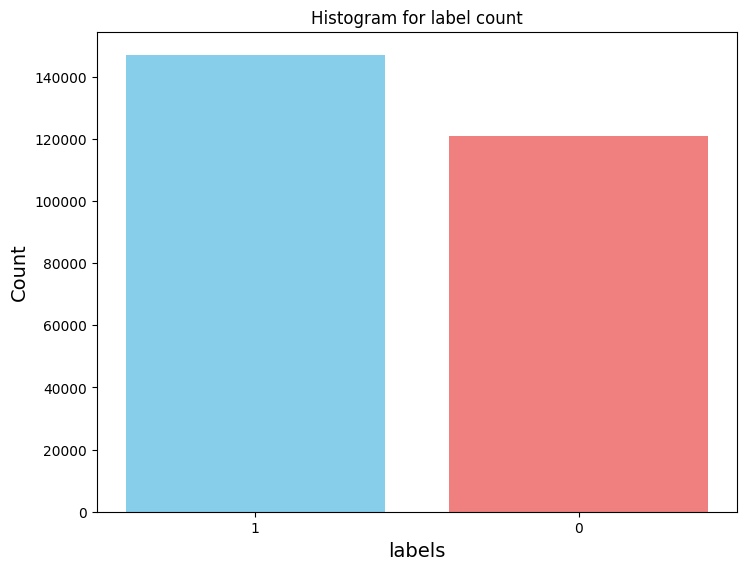

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['1', '0']
count = [147179,120895]
colors = ['skyblue', 'lightcoral']
ax.bar(labels,count,color = colors)

plt.title('Histogram for label count', fontsize=12)
plt.xlabel('labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


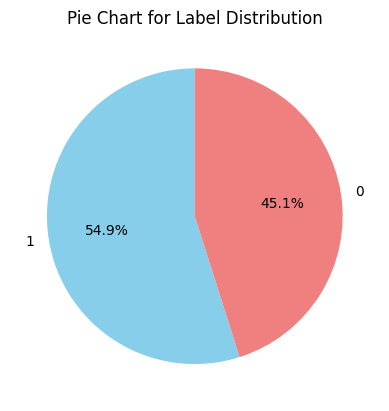

In [8]:
import matplotlib.pyplot as plt

labels = ['1', '0']
count = [147179, 120895]
colors = ['skyblue', 'lightcoral']

plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Pie Chart for Label Distribution')
plt.show()


In [9]:
data.nunique().to_dict()

{'timestamp': 35924,
 'FQDN_count': 34,
 'subdomain_length': 24,
 'upper': 5,
 'lower': 34,
 'numeric': 13,
 'entropy': 630,
 'special': 8,
 'labels': 7,
 'labels_max': 31,
 'labels_average': 73,
 'longest_word': 6224,
 'sld': 11112,
 'len': 32,
 'subdomain': 2,
 'Target Attack': 2}

In [10]:
# Check for duplicates in the 'timestamp' column
is_duplicate = data['timestamp'].duplicated().any()

# Check for missing values (NaN) in the 'timestamp' column
has_missing_values = data['timestamp'].isna().any()

print(f"Duplicates in 'timestamp' column: {is_duplicate}")
print(f"Missing values (NaN) in 'timestamp' column: {has_missing_values}")


Duplicates in 'timestamp' column: True
Missing values (NaN) in 'timestamp' column: False


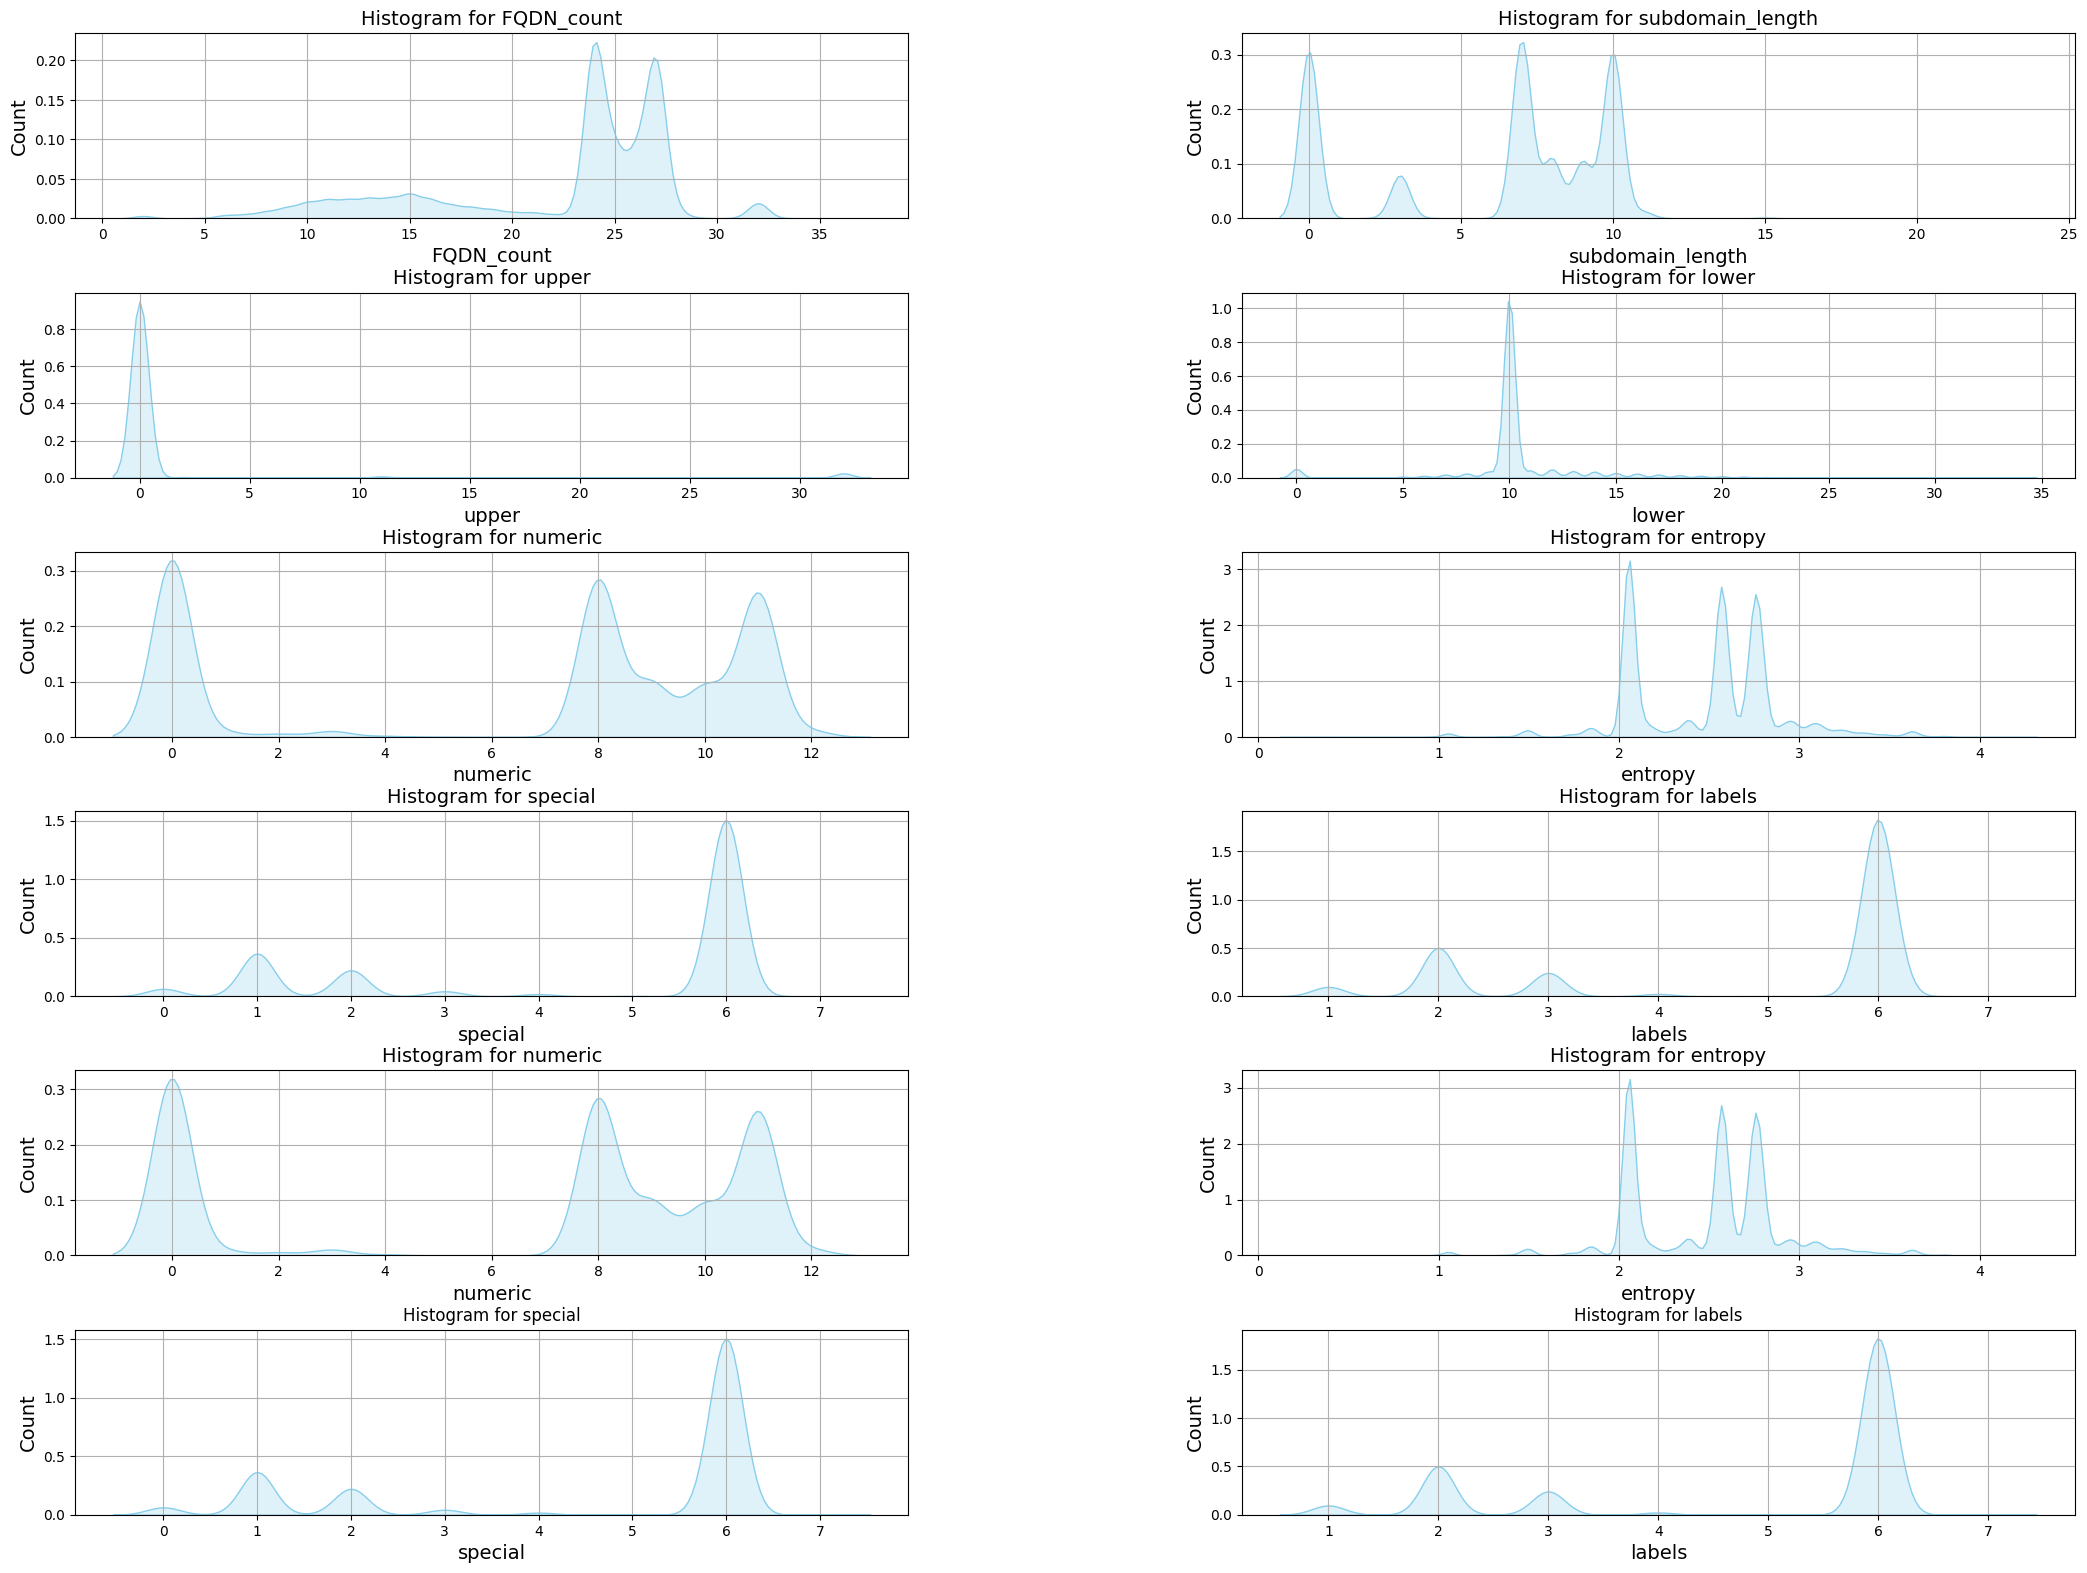

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(25, 25))
figure.tight_layout(pad=5.0)

plt.subplot(8, 2, 1)
res = sns.kdeplot(data["FQDN_count"], color='skyblue', fill=True)
plt.title('Histogram for FQDN_count', fontsize=14)
plt.xlabel('FQDN_count', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 2)
res = sns.kdeplot(data["subdomain_length"], color='skyblue', fill=True)
plt.title('Histogram for subdomain_length', fontsize=14)
plt.xlabel('subdomain_length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 3)
res = sns.kdeplot(data["upper"], color='skyblue', fill=True)
plt.title('Histogram for upper', fontsize=14)
plt.xlabel('upper', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 4)
res = sns.kdeplot(data["lower"], color='skyblue', fill=True)
plt.title('Histogram for lower', fontsize=14)
plt.xlabel('lower', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 5)
res = sns.kdeplot(data["numeric"], color='skyblue', fill=True)
plt.title('Histogram for numeric', fontsize=14)
plt.xlabel('numeric', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 6)
res = sns.kdeplot(data["entropy"], color='skyblue', fill=True)
plt.title('Histogram for entropy', fontsize=14)
plt.xlabel('entropy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 7)
res = sns.kdeplot(data["special"], color='skyblue', fill=True)
plt.title('Histogram for special', fontsize=14)
plt.xlabel('special', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 8)
res = sns.kdeplot(data["labels"], color='skyblue', fill=True)
plt.title('Histogram for labels', fontsize=14)
plt.xlabel('labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 9)
res = sns.kdeplot(data["numeric"], color='skyblue', fill=True)
plt.title('Histogram for numeric', fontsize=14)
plt.xlabel('numeric', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 10)
res = sns.kdeplot(data["entropy"], color='skyblue', fill=True)
plt.title('Histogram for entropy', fontsize=14)
plt.xlabel('entropy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 11)
res = sns.kdeplot(data["special"], color='skyblue', fill=True)
plt.title('Histogram for special', fontsize=12)
plt.xlabel('special', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8, 2, 12)
res = sns.kdeplot(data["labels"], color='skyblue', fill=True)
plt.title('Histogram for labels', fontsize=12)
plt.xlabel('labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


 ## Data Preprocessing


In [12]:
print(data.describe())
print("\nMissing Values:\n", data.isna().sum())

          FQDN_count  subdomain_length          upper          lower  \
count  268074.000000     268074.000000  268074.000000  268074.000000   
mean       22.286596          6.059021       0.845420      10.410014   
std         6.001205          3.899505       4.941929       3.207725   
min         2.000000          0.000000       0.000000       0.000000   
25%        18.000000          3.000000       0.000000      10.000000   
50%        24.000000          7.000000       0.000000      10.000000   
75%        27.000000         10.000000       0.000000      10.000000   
max        36.000000         23.000000      32.000000      34.000000   

             numeric        entropy        special         labels  \
count  268074.000000  268074.000000  268074.000000  268074.000000   
mean        6.497586       2.485735       4.533577       4.788823   
std         4.499866       0.407709       2.187683       1.803256   
min         0.000000       0.219195       0.000000       1.000000   
25%   

In [13]:
data['longest_word'] = data['longest_word'].map(lambda x : int(x) if str(x).isdigit() else int(len(str(x))))

In [14]:
Index=pd.Series(np.arange(0,data.shape[0],1))
data.insert(0,"index",Index)

[(0,          index timestamp  FQDN_count  subdomain_length  upper  lower  numeric  \
2            2   23:15.1          26                 9      0     10       10   
6            6   26:58.3          23                 3      0     20        0   
8            8   27:59.6          14                 3      0     12        0   
9            9   21:27.9          18                 0      0     17        0   
10          10   09:54.6          24                 7      0     10        8   
...        ...       ...         ...               ...    ...    ...      ...   
268066  268066   09:20.8          27                10      0     10       11   
268068  268068   21:37.5          12                 5      0     10        0   
268069  268069   33:51.5          18                 3      0     16        0   
268070  268070   36:02.5          27                10      0     10       11   
268072  268072   24:25.1          16                 0      0     14        0   

         entropy  spec

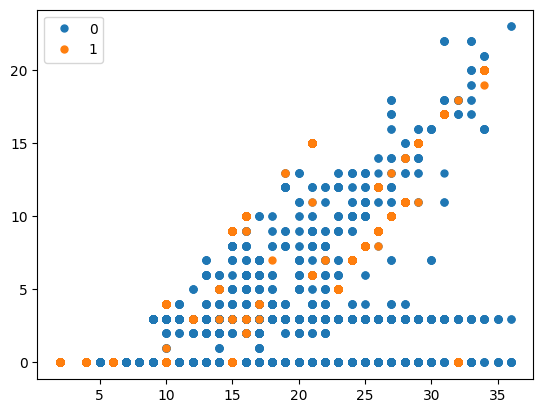

In [15]:
groups = data.groupby('Target Attack')
print(list(groups))
for name, group in groups:
    plt.plot(group['FQDN_count'], group['subdomain_length'], marker='o', linestyle='', markersize=5, label=name)

plt.legend()

In [16]:
labelencoder = LabelEncoder()
data['sld']= labelencoder.fit_transform(data['sld'])
data

,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1,0
268070,268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,0
268071,268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
268072,268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0,0


In [17]:
data['timestamp']= labelencoder.fit_transform(data['timestamp'])

In [18]:
print(data.isna().sum())
data.nunique().to_dict()

index               0
timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


{'index': 268074,
 'timestamp': 35924,
 'FQDN_count': 34,
 'subdomain_length': 24,
 'upper': 5,
 'lower': 34,
 'numeric': 13,
 'entropy': 630,
 'special': 8,
 'labels': 7,
 'labels_max': 31,
 'labels_average': 73,
 'longest_word': 17,
 'sld': 11112,
 'len': 32,
 'subdomain': 2,
 'Target Attack': 2}

In [19]:
data = data.rename(columns = {'Target Attack': 'target_attack'}) 
data

,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,target_attack
0,0,33728,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,1,4433,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,2,13928,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,3,2917,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,4,7622,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,20282,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1,0
268070,268070,21591,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,0
268071,268071,22381,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
268072,268072,14628,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0,0


In [20]:
training_data =data.iloc[:,:16]


In [21]:
training_data = training_data.drop('index',axis=1)


In [22]:
target_data = data['target_attack']
target_data

0         1
1         1
2         0
3         1
4         1
         ..
268069    0
268070    0
268071    1
268072    0
268073    1
Name: target_attack, Length: 268074, dtype: int64

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data, target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(179609, 15) (88465, 15) (179609,) (88465,)


In [24]:
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [25]:
scaled_x_test.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain'],
      dtype='object')

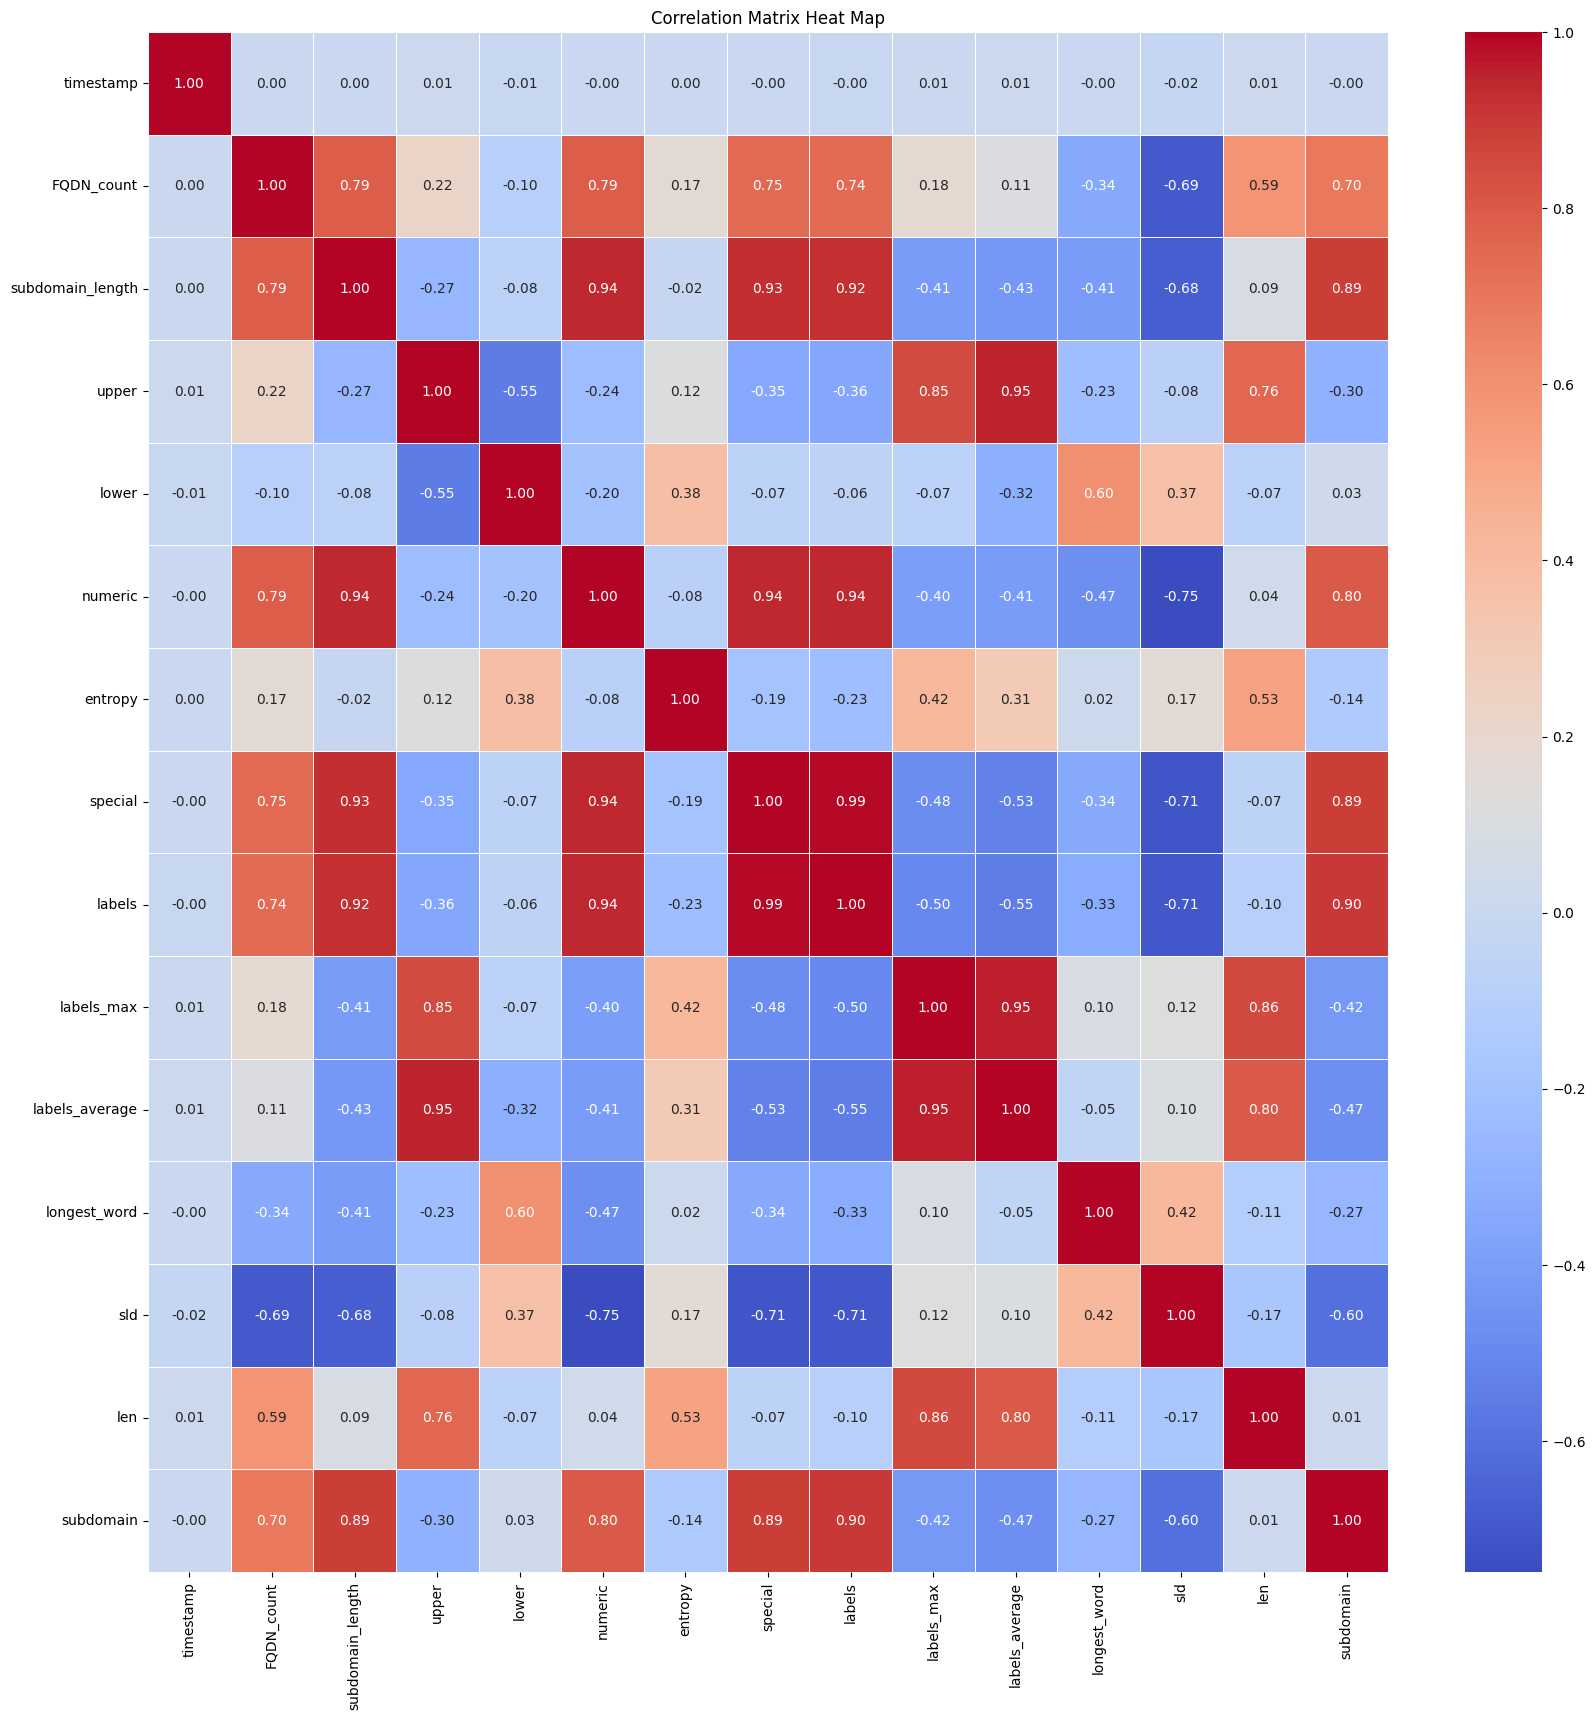

In [84]:
cor = scaled_x_train.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heat Map')
plt.show()


### Applying SelectKBest 

In [85]:
test = SelectKBest(score_func=chi2,k=4)
fit = test.fit(scaled_x_train,Y_train)
fit.scores_

array([2.36617648e+00, 2.95864852e+03, 6.37723376e+03, 8.26567972e+02,
       4.55208374e+02, 1.66978648e+04, 4.60361806e+01, 9.14921691e+03,
       8.30139401e+03, 1.78450302e+02, 2.76899909e+02, 1.11840398e+03,
       2.75633871e+04, 2.36840298e+02, 1.11042528e+04])

In [86]:
p_val_1 = pd.Series(fit.scores_)
p_val_1.index = scaled_x_train.columns
p_val_1

timestamp               2.366176
FQDN_count           2958.648517
subdomain_length     6377.233763
upper                 826.567972
lower                 455.208374
numeric             16697.864763
entropy                46.036181
special              9149.216914
labels               8301.394010
labels_max            178.450302
labels_average        276.899909
longest_word         1118.403980
sld                 27563.387089
len                   236.840298
subdomain           11104.252830
dtype: float64

In [87]:
p_val_1=p_val_1.sort_values(ascending=False)
p_val_1

sld                 27563.387089
numeric             16697.864763
subdomain           11104.252830
special              9149.216914
labels               8301.394010
subdomain_length     6377.233763
FQDN_count           2958.648517
longest_word         1118.403980
upper                 826.567972
lower                 455.208374
labels_average        276.899909
len                   236.840298
labels_max            178.450302
entropy                46.036181
timestamp               2.366176
dtype: float64

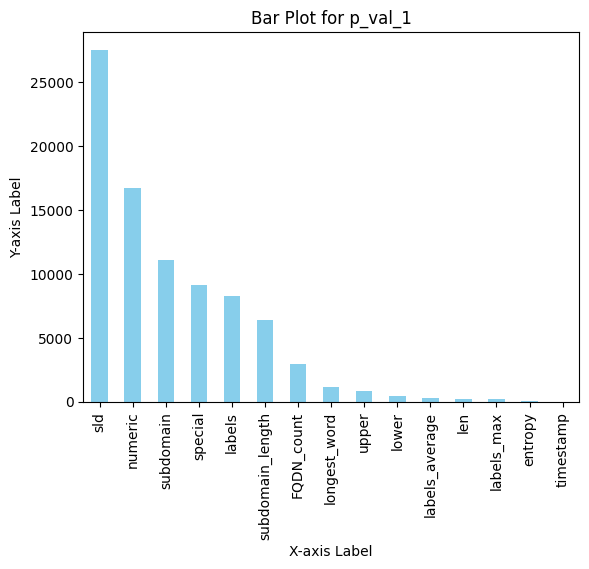

In [88]:
p_val_1.plot.bar(color='skyblue')
plt.title('Bar Plot for p_val_1')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


In [89]:
dependent_features=scaled_x_train.columns

Feature timestamp: 14.371568
Feature FQDN_count: 83417.912563
Feature subdomain_length: 87179.243609
Feature upper: 920.435865
Feature lower: 17256.303836
Feature numeric: 100732.747778
Feature entropy: 2555.590610
Feature special: 92188.694201
Feature labels: 86330.287888
Feature labels_max: 1744.180255
Feature labels_average: 1125.476260
Feature longest_word: 22129.927306
Feature sld: 79114.585592
Feature len: 4598.302103
Feature subdomain: 60580.063623


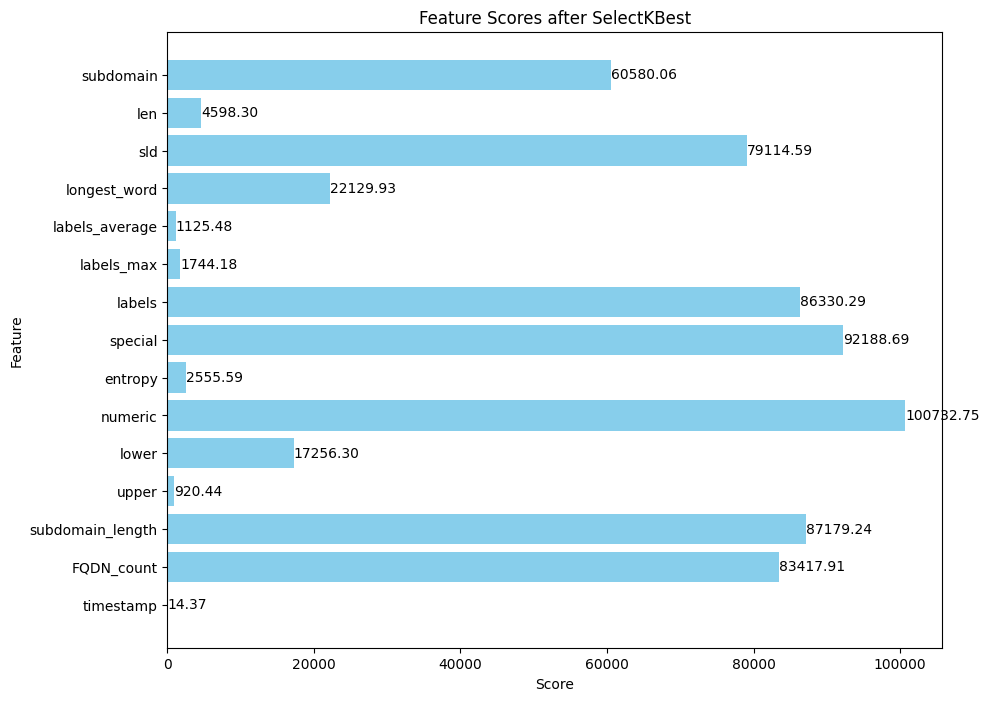

In [90]:
# Assuming 'scaled_x_train' and 'Y_train' are your training data and labels
feature_selection = SelectKBest(score_func=f_classif, k='all')
feature_selection.fit(scaled_x_train, Y_train.values.ravel())

X_train_fs = feature_selection.transform(scaled_x_train)
X_test_fs = feature_selection.transform(scaled_x_test)


for i in range(len(feature_selection.scores_)):
    print('Feature %s: %f' % (dependent_features[i], feature_selection.scores_[i]))


# Get the scores and feature names
scores = feature_selection.scores_
feature_names = dependent_features

plt.figure(figsize=(10, 8))
bars = plt.barh([i for i in dependent_features], feature_selection.scores_, color='skyblue')
for bar, count in zip(bars, feature_selection.scores_):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count:.2f}', va='center', ha='left')

plt.title('Feature Scores after SelectKBest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()


In [91]:
full_data = scaled_x_train
full_target_data = Y_train.copy()


In [92]:
importances = full_data.apply(lambda x: x.corr(full_target_data))
indices = np.argsort(importances)


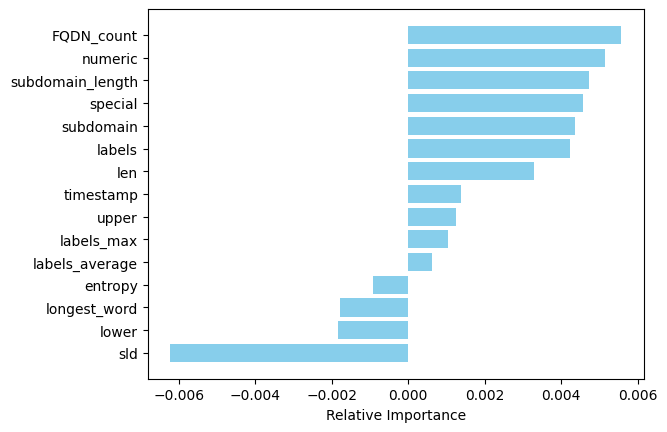

In [93]:
names = full_data.columns
plt.barh(range(len(indices)), importances.iloc[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#Information Gain 

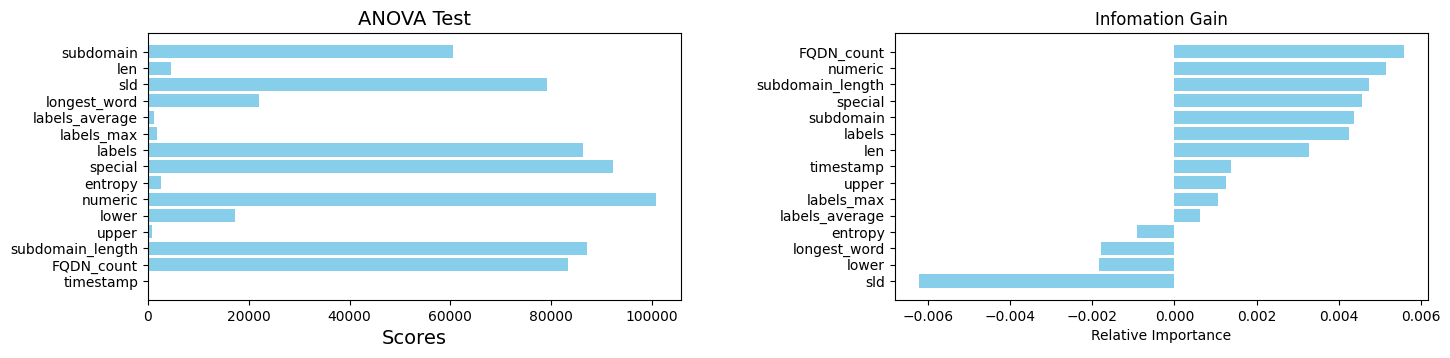

In [94]:
figure = plt.figure(figsize=(16, 8))
figure.tight_layout(pad=5.0)

plt.subplot(2, 2, 1)
plt.barh([i for i in dependent_features], feature_selection.scores_, color='skyblue')  # Set color to skyblue
plt.title('ANOVA Test', fontsize=14)
plt.xlabel('Scores', fontsize=14)
plt.grid(False)  

plt.subplot(2, 2, 2)
names = full_data.columns
plt.title('Infomation Gain')
plt.barh(range(len(indices)), importances.iloc[indices], color='skyblue', align='center')  # Use iloc for explicit position-based indexing
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(False)  

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


## Variables used for Model Training 
- "timestamp"
- "FQDN_count"
- "subdomain_length"
- "upper"
- "lower"
- "numeric"
- "entropy"
- "special"
- "labels"
- "labels_average"
- "longest_word"

- "sld"
- "subdomain"


In [95]:
for i in range(0, len(indices)):
    if np.abs(importances.iloc[i]) > 0.001:
        print(full_data.columns[i])

timestamp
FQDN_count
subdomain_length
upper
lower
numeric
special
labels
labels_max
longest_word
sld
len
subdomain


In [96]:
training_data_after_fs = training_data[['timestamp','FQDN_count','subdomain_length','upper','lower','numeric','special','labels','labels_max','longest_word','sld','len','subdomain']]

## Data Partitioning for Model Evaluation

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data_after_fs, target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(179609, 13) (88465, 13) (179609,) (88465,)


In [98]:
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [99]:
def Plot_graph(accuracy, precision, f1_score_measure, recall):
    figure = plt.figure(figsize=(16, 8))

    figure.tight_layout(pad=5.0)
    folds = [i for i in range(len(accuracy))]

    plt.subplot(2, 2, 1)
    plt.plot(folds, accuracy, color='skyblue', marker='o')
    plt.title('accuracy Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(folds, precision, color='skyblue', marker='o')
    plt.title('precision Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('precision', fontsize=14)
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(folds, recall, color='skyblue', marker='o')
    plt.title('recall Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('recall', fontsize=14)
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(folds, f1_score_measure, color='skyblue', marker='o')
    plt.title('f1_score Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('f1_score', fontsize=14)
    plt.grid(True)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

def get_mean(accuracy,error,precision,f1_score_measure,recall):
    
    print("Mean Accuracy for Random Forest Classifier: ", mean(accuracy))
    print("Mean precision for Random Forest Classifier: ", mean(precision))
    print("Mean recall for Random Forest Classifier: ", mean(recall))
    print("Mean f1_score for Random Forest Classifier: ", mean(f1_score_measure))
    
def K_Fold_With_Dataset(scaled_x_train,clf,sampling=None):
    kfold = KFold(n_splits=10, shuffle=False)
    error=[]
    accuracy=[]
    precision=[]
    recall=[]
    f1_score_measure=[]
    for train_index, test_index in kfold.split(scaled_x_train):
        xtrain,xtest = scaled_x_train.iloc[train_index],scaled_x_train.iloc[test_index]
        ytrain,ytest = Y_train.iloc[train_index],Y_train.iloc[test_index]
        
        rf1 = clf
        if sampling=='Oversample':
            oversample = SMOTE()
            X_DB1, Y_DB1 = oversample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB1, Y_DB1)
            
        elif sampling=='Undersample':
            undersample = EditedNearestNeighbours()
            X_DB2, Y_DB2 = undersample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB2, Y_DB2)
        else:
            rf1=rf1.fit(xtrain, ytrain)
        
        
        RF_predictions = rf1.predict(xtest)
        
        error.append(mean_squared_error(ytest,RF_predictions))
        accuracy.append(accuracy_score(ytest, RF_predictions))
        precision.append(precision_score(ytest, RF_predictions))
        recall.append(recall_score(ytest, RF_predictions))
        f1_score_measure.append(f1_score(ytest, RF_predictions))
        
        
    get_mean(accuracy,error,precision,f1_score_measure,recall)
    Plot_graph(accuracy,precision,f1_score_measure,recall)


## Random Forest

Mean Accuracy for Random Forest Classifier:  0.8248528880751155
Mean precision for Random Forest Classifier:  0.7588367530030762
Mean recall for Random Forest Classifier:  0.998491153372826
Mean f1_score for Random Forest Classifier:  0.8623163202063125


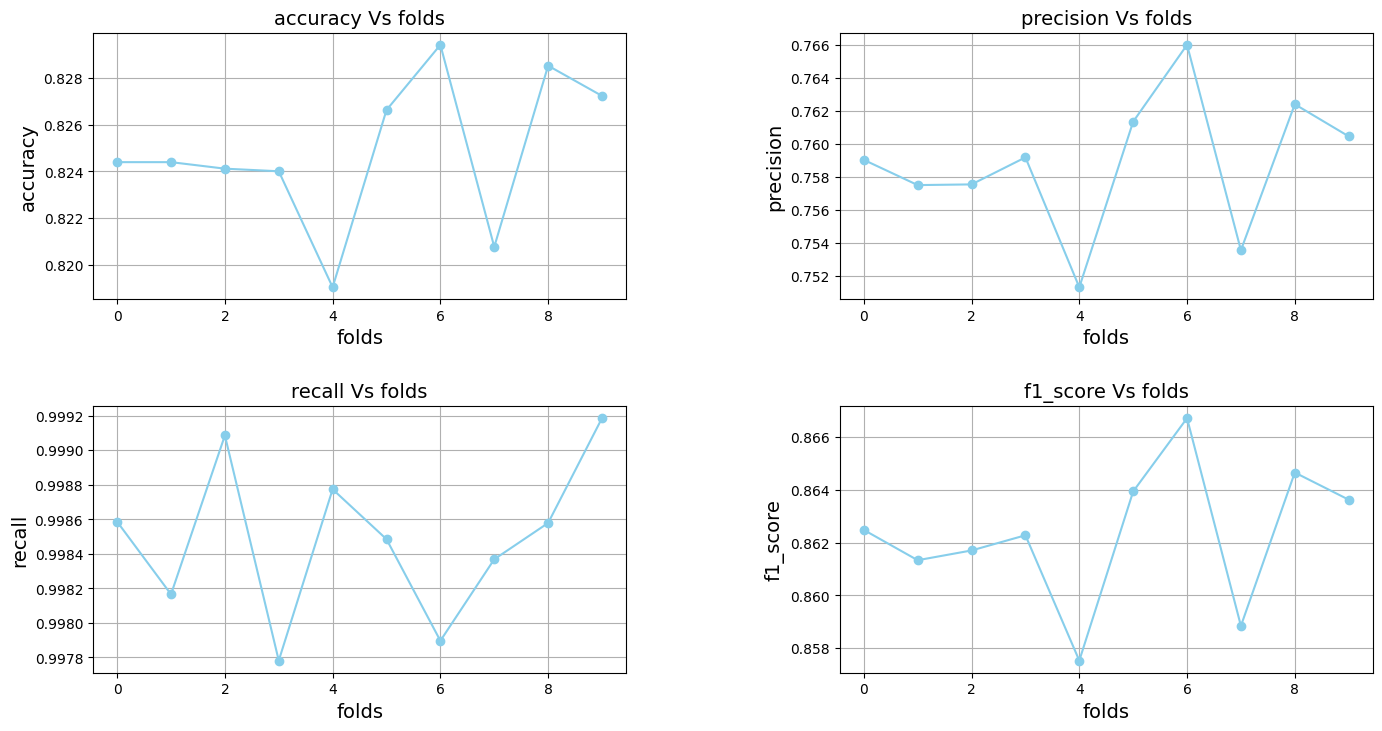

In [100]:
rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='sqrt', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(scaled_x_train,rf1,sampling=None)

## k Nearest Neighbour

Mean Accuracy for Random Forest Classifier:  0.8121140899317985
Mean precision for Random Forest Classifier:  0.7629772045873885
Mean recall for Random Forest Classifier:  0.9545062224167469
Mean f1_score for Random Forest Classifier:  0.8480538049823787


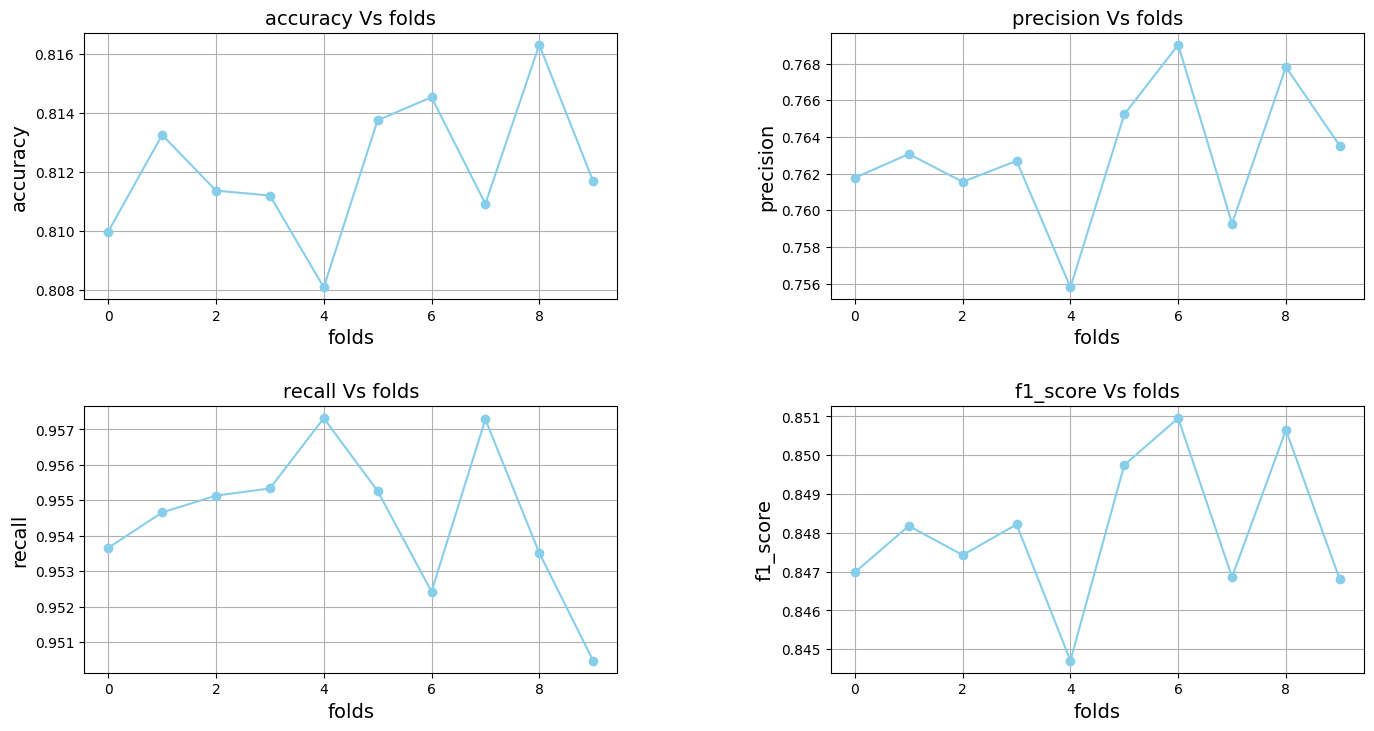

In [101]:
rf1 = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')
K_Fold_With_Dataset(scaled_x_train,rf1,sampling=None)

## XG BOOST


Mean Accuracy for Random Forest Classifier:  0.8261167421767207
Mean precision for Random Forest Classifier:  0.7600278202889373
Mean recall for Random Forest Classifier:  0.9988345361811891
Mean f1_score for Random Forest Classifier:  0.8632138290923159


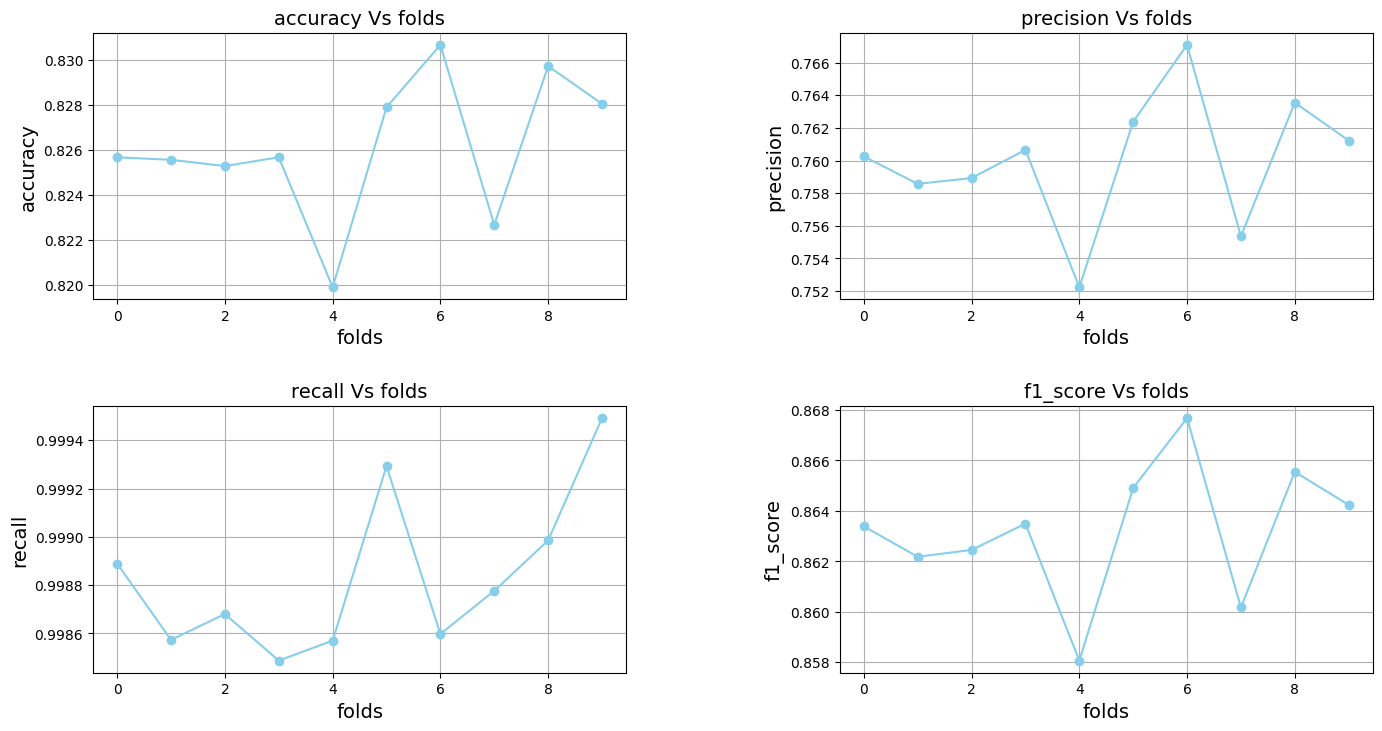

In [102]:
rf1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
K_Fold_With_Dataset(scaled_x_train,rf1,sampling=None)

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

DT = DecisionTreeClassifier()
DT.fit(scaled_x_train,Y_train)
DT_predictions=DT.predict(scaled_x_test)

DT_accuracy = accuracy_score(Y_test, DT_predictions)
DT_precision = precision_score(Y_test, DT_predictions)
DT_recall = recall_score(Y_test, DT_predictions)

In [104]:
print("Accuracy: ", DT_accuracy,"\nprecision",DT_precision,"\nRecall", DT_recall)

Accuracy:  0.7323461255863901 
precision 0.7667769376181475 
Recall 0.7357366641932558


[[29092 10857]
 [12821 35695]]


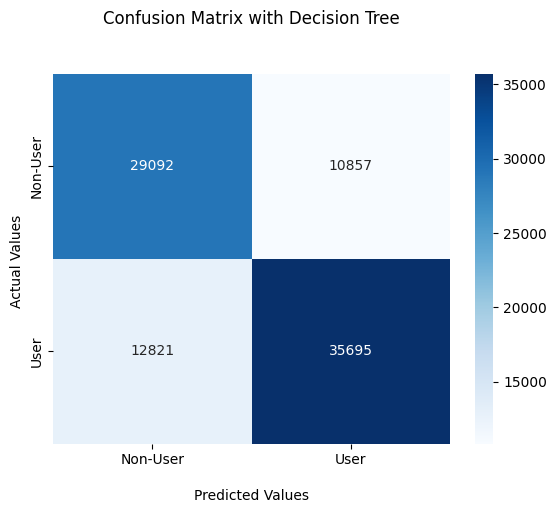

In [105]:
fig = plt.figure()

cf_matrix_DT = confusion_matrix(Y_test, DT_predictions)
print(cf_matrix_DT)
ax = sns.heatmap(cf_matrix_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

In [106]:
RF=RandomForestClassifier(n_estimators=1000, 
                    max_depth=5,
                    max_features='sqrt', 
                    bootstrap=True, 
                    n_jobs=-1, 
                    random_state=42)


RF.fit(scaled_x_train,Y_train)
RF_predictions=RF.predict(scaled_x_test)

RF_accuracy = accuracy_score(Y_test, RF_predictions)
RF_precision = precision_score(Y_test, RF_predictions)
RF_recall = recall_score(Y_test, RF_predictions)

In [1]:
scaled_x_train

NameError: name 'scaled_x_train' is not defined

In [107]:
print("Accuracy: ", RF_accuracy,"\nprecision",RF_precision,"\nRecall", RF_recall)

Accuracy:  0.8267450404114621 
precision 0.7604815797322115 
Recall 0.998598400527661


In [108]:
pickle.dump(RF, open('RF_static_12_11.pkl', 'wb'))

[[24690 15259]
 [   68 48448]]


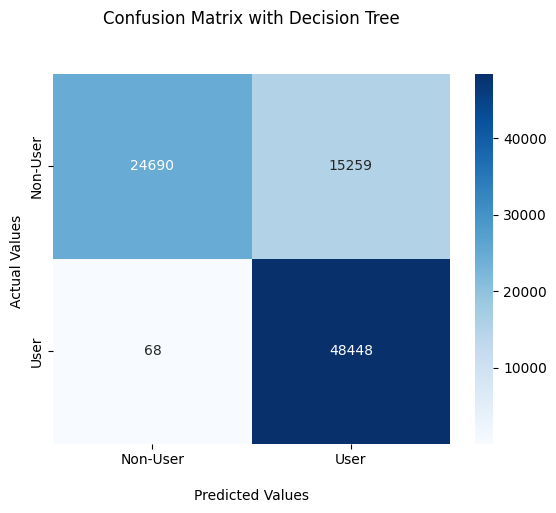

In [109]:
fig = plt.figure()

cf_matrix_RF = confusion_matrix(Y_test, RF_predictions)
print(cf_matrix_RF)
ax = sns.heatmap(cf_matrix_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

In [110]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(scaled_x_train,Y_train)
KNN_predictions=KNN.predict(scaled_x_test)

KNN_accuracy = accuracy_score(Y_test, KNN_predictions)
KNN_precision = precision_score(Y_test, KNN_predictions)
KNN_recall = recall_score(Y_test, KNN_predictions)

print("Accuracy: ", KNN_accuracy,"\nprecision",KNN_precision,"\nRecall", KNN_recall)


Accuracy:  0.8147629005821512 
precision 0.764588651898213 
Recall 0.9568389809547366


[[25656 14293]
 [ 2094 46422]]


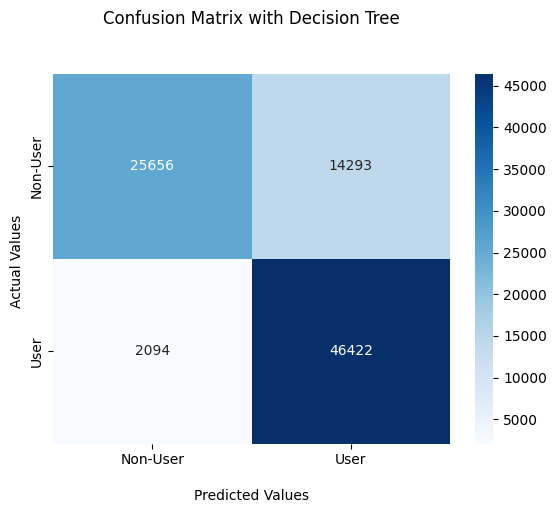

In [111]:
fig = plt.figure()

cf_matrix_KNN = confusion_matrix(Y_test, KNN_predictions)
print(cf_matrix_KNN)
ax = sns.heatmap(cf_matrix_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

In [112]:
xgb_model_1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model_1.fit(scaled_x_train,Y_train)

XGB_predictions = xgb_model_1.predict(scaled_x_test)
XGB_accuracy = accuracy_score(Y_test, XGB_predictions)
XGB_precision = precision_score(Y_test, XGB_predictions)
XGB_recall = recall_score(Y_test, XGB_predictions)

print("Accuracy: ", XGB_accuracy,"\nprecision",XGB_precision,"\nRecall", XGB_recall)


Accuracy:  0.8279432543943933 
precision 0.7615105483906439 
Recall 0.9991961414790996


In [113]:
pickle.dump(xgb_model_1, open('xgb_model_static_12_11.pkl', 'wb'))
loaded_model = pickle.load(open('xgb_model_static_12_11.pkl', 'rb'))
result = loaded_model.score(scaled_x_test, Y_test)
print(result)


0.8279432543943933


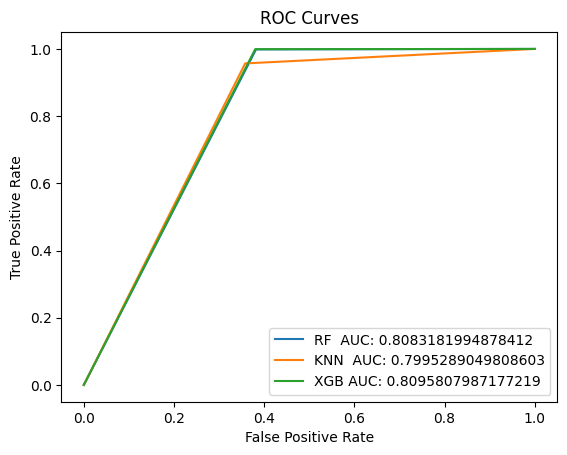

In [114]:

fpr, tpr, _ = metrics.roc_curve(Y_test,  RF_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  KNN_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  XGB_predictions)

#create ROC curve
plt.plot(fpr,tpr, label="RF  AUC: "+str(roc_auc_score(Y_test,  RF_predictions)))
plt.plot(fpr1,tpr1, label="KNN  AUC: "+str(roc_auc_score(Y_test,  KNN_predictions)))
plt.plot(fpr2,tpr2, label="XGB AUC: "+str(roc_auc_score(Y_test,  XGB_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves')
plt.legend(loc=4)
plt.show()